In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)

from sklearn.cross_validation import train_test_split
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)
import statsmodels.api as stm
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
plt.rcParams['text.color'] = 'k'

C:\Users\L30908\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
data = pd.read_csv('Desktop/TJ_Dataset.csv', header=0)
df1 = pd.DataFrame({'CID': data['Clinic ID'],'ID': data['Unique_Identifier'], 'Gender': data['Gender'], 'Nationality': data['Nationality'], 'Test_Date': data['Test_Date'], 'Profile_Name': data['Profile_Name'],'Age': data['Age'],'Score': data['Score'],'Conclusion': data['Conclusion'],'Score_Level': data['Score_Level'],'Name': data['Name'], 'T1': data['Threshold_1'],'T2': data['Threshold_2'],'SI_Conversion': data['SI_Conversion']})
df1.groupby(['CID','ID', 'Gender', 'Age', 'Nationality', 'Test_Date', 'Profile_Name', 'Score_Level', 'Score', 'T1', 'T2', 'SI_Conversion', 'Name']).count().unstack(fill_value=0)

Conclusion  \
Name                                                                                                                              Albumin    
CID ID                               Gender Age Nationality Test_Date Profile_Name Score_Level Score  T1    T2    SI_Conversion              
11  003d25e3fac5a1d2aa4ba502ffb77b5b F      67  SINGAPOREAN 24/05/17  LIFE1        0           0.00   0.0   0.0   1.0000                 0   
                                                                                                      60.0  0.0   1.0000                 0   
                                                                                   1           0.50   0.0   1.0   1.0000                 0   
                                                                                               0.80   0.5   1.3   1.0000                 0   
                                                                                               2.95   4.4   0.0   1.0000                 0   
                                                                                               3.20   2.0   3.7   1.0000                 0   
                                                                                               3.40   2.3   4.7   1.0000                 0   
                                                                                               3.50   3.3   5.1   1.0000                 0   
                                                                                               4.10   2.4   5.7   1.0000                 0   
                                                                                               4.70   3.7   5.1   1.0000                 1   
                                                                                               5.60   0.0   6.0   1.0000                 0   
                                                                                               6.60   4.0   10.0  1.0000                 0   
                                                                                               7.90   6.2   8.2   1.0000                 0   
                                                                                               9.50   8.4   10.4  1.0000                 0   
                                                                                               9.90   2.0   10.0  1.0000                 0   
                                                                                               16.00  8.0   40.0  1.0000                 0   
                                                                                               22.00  22.0  0.0   1.0000                 0   
                                                                                               31.00  27.0  32.0  1.0000                 0   
                                                                                               32.00  10.0  46.0  1.0000                 0   
                                                                                               34.00  32.0  36.0  1.0000                 0   
                                                                                               36.00  15.0  41.0  1.0000                 0   
                                                                                               38.00  38.0  52.0  1.0000                 0   
                                                                                               40.00  36.0  120.0 1.0000                 0   
                                                                                               48.00  40.0  75.0  1.0000                 0   
                                                                                               57.00  38.0  0.0   38.6698                0   
                                                                                               92.00  130.0 0.0   38.6698                0   
          

In [3]:
#df1= df.loc[df['ID'] == '0079e1b73a94ba341f53ca22c6910782']
#df1

In [4]:
df1.loc[df1.Conclusion == 'Desirable', 'Conclusion'] = 'Desirable'
df1.loc[df1.Conclusion != 'Desirable', 'Conclusion'] = 'Not Desirable'

In [5]:
df1.head()

,CID,ID,Gender,Nationality,Test_Date,Profile_Name,Age,Score,Conclusion,Score_Level,Name,T1,T2,SI_Conversion
0,11,cb1d683b1f24f3c494138f6cbaf2ce4c,M,SINGAPOREAN,16/01/16,"LIFE3 MALE,FPSAP",59,4.4,Desirable,1,Albumin,3.7,5.1,1.0
1,11,cb1d683b1f24f3c494138f6cbaf2ce4c,M,SINGAPOREAN,10/01/17,LIFE3 MALE,60,4.5,Desirable,1,Albumin,3.7,5.1,1.0
2,11,b2fa0f5835ef1847636d5720fc9f30c9,F,SINGAPOREAN,09/07/16,"LIFE2,HBA1CP",83,4.2,Desirable,1,Albumin,3.7,5.1,1.0
3,11,3f663f8eadfcf405cb7bdb6bf7e14d1a,F,SINGAPOREAN,07/03/17,LIFE1,76,4.0,Desirable,1,Albumin,3.7,5.1,1.0
4,11,f57a87f0625c6b3e44ce79af78b34f60,F,SINGAPOREAN,07/01/16,LIFE2,58,4.3,Desirable,1,Albumin,3.7,5.1,1.0


In [6]:
textReplace = {'Desirable': 0, 'Not Desirable': 1, 'High': 1, 'Not High': 0, 'Low': 1, 'Not Low': 0}
df1.Conclusion =[textReplace[i] for i in df1.Conclusion]

In [7]:
df1['Conclusion'].value_counts()

0    13559
1     9868
Name: Conclusion, dtype: int64

In [8]:
df_code = pd.get_dummies(df1)
df_code

,CID,Age,Score,Conclusion,Score_Level,T1,T2,SI_Conversion,ID_003d25e3fac5a1d2aa4ba502ffb77b5b,ID_0079e1b73a94ba341f53ca22c6910782,...,Name_Urine Micro organism,Name_Urine Nitrite,Name_Urine PH,Name_Urine Protein,Name_Urine Red Blood Cell,Name_Urine Urobilinogen,Name_Urine White Blood cell,Name_Urine specific gravity,Name_Urine white blood cell,Name_e GFR
0,11,59,4.4,0,1,3.7,5.1,1.0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,11,60,4.5,0,1,3.7,5.1,1.0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,11,83,4.2,0,1,3.7,5.1,1.0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,11,76,4.0,0,1,3.7,5.1,1.0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,11,58,4.3,0,1,3.7,5.1,1.0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,11,59,4.2,0,1,3.7,5.1,1.0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,11,51,4.2,0,1,3.7,5.1,1.0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,11,52,4.1,0,1,3.7,5.1,1.0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,11,44,3.9,0,1,3.7,5.1,1.0,0,1,...,0,0,0,0,0,0,0,0,0,0
9,11,68,3.9,0,1,3.7,5.1,1.0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score
from imblearn.over_sampling import SMOTE

df_code = pd.get_dummies(df1)
training_features, test_features, \
training_target, test_target, = train_test_split(df_code.drop(['Conclusion'], axis=1),
                                               df_code['Conclusion'],
                                               test_size = .3,
                                               random_state=0)

x_train, x_val, y_train, y_val = train_test_split(training_features, training_target,
                                                  test_size = .3,
                                                  random_state=0)
sm = SMOTE(random_state=0)
x_train_res, y_train_res = sm.fit_sample(x_train, y_train)
x_train_res = pd.DataFrame(data=x_train_res,columns=x_train.columns )
y_train_res = pd.DataFrame(data=y_train_res,columns=['Conclusion'])
# we can Check the numbers of our data
print("length of oversampled data is ",len(x_train_res))
print("Number of not desirable conclusions in oversampled data",len(y_train_res[y_train_res['Conclusion']==0]))
print("Number of conclusions",len(y_train_res[y_train_res['Conclusion']==1]))
print("Proportion of not desirable conclusions in oversampled data is ",len(y_train_res[y_train_res['Conclusion']==0])/len(x_train_res))
print("Proportion of desirable conclusions in oversampled data is ",len(y_train_res[y_train_res['Conclusion']==1])/len(x_train_res))

length of oversampled data is  13320
Number of not desirable conclusions in oversampled data 6660
Number of conclusions 6660
Proportion of not desirable conclusions in oversampled data is  0.5
Proportion of desirable conclusions in oversampled data is  0.5


In [10]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11478 entries, 18163 to 14558
Columns: 1312 entries, CID to Name_e GFR
dtypes: float64(4), int64(3), uint8(1305)
memory usage: 15.0 MB


In [11]:
x_train_res.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Columns: 1312 entries, CID to Name_e GFR
dtypes: float64(1312)
memory usage: 133.3 MB


In [12]:
x_train_res

,CID,Age,Score,Score_Level,T1,T2,SI_Conversion,ID_003d25e3fac5a1d2aa4ba502ffb77b5b,ID_0079e1b73a94ba341f53ca22c6910782,ID_00d64d073ff05912189aa31bf8ce5d17,...,Name_Urine Micro organism,Name_Urine Nitrite,Name_Urine PH,Name_Urine Protein,Name_Urine Red Blood Cell,Name_Urine Urobilinogen,Name_Urine White Blood cell,Name_Urine specific gravity,Name_Urine white blood cell,Name_e GFR
0,11.000000,44.000000,16.000000,1.0,10.000000,46.0000,1.0000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0
1,13.000000,47.000000,1.025000,1.0,1.001000,1.0350,1.0000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,1.0,0.000000,0.0
2,11.000000,43.000000,3.600000,2.0,3.700000,5.1000,1.0000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0
3,11.000000,61.000000,0.600000,1.0,0.000000,1.0000,1.0000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0
4,13.000000,42.000000,3.400000,1.0,2.000000,3.7000,1.0000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0
5,13.000000,37.000000,27.000000,1.0,27.000000,32.0000,1.0000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0
6,11.000000,77.000000,32.000000,1.0,32.000000,36.0000,1.0000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0
7,11.000000,42.000000,3.100000,1.0,2.000000,3.7000,1.0000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0
8,11.000000,37.000000,79.000000,2.0,3.900000,6.2000,1.0000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0
9,11.000000,80.000000,5.500000,1.0,4.000000,10.0000,1.0000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0


In [13]:
y_train_res

,Conclusion
0,0
1,0
2,1
3,0
4,0
5,0
6,0
7,0
8,1
9,0


In [14]:
x_train_res['Test_Date'] = df1['Test_Date']
x_train_res['ID'] = df1['ID']
x_train_res['Name'] = df1['Name']
x_val['Test_Date'] = df1['Test_Date']
x_val['ID'] = df1['ID']
x_val['Name'] = df1['Name']

C:\Users\L30908\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\Users\L30908\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
C:\Users\L30908\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] =

In [15]:
x_train1 = x_train_res[['ID', 'Test_Date', 'Name', 'Score']]
x_train1

,ID,Test_Date,Name,Score
0,cb1d683b1f24f3c494138f6cbaf2ce4c,16/01/16,Albumin,16.000000
1,cb1d683b1f24f3c494138f6cbaf2ce4c,10/01/17,Albumin,1.025000
2,b2fa0f5835ef1847636d5720fc9f30c9,09/07/16,Albumin,3.600000
3,3f663f8eadfcf405cb7bdb6bf7e14d1a,07/03/17,Albumin,0.600000
4,f57a87f0625c6b3e44ce79af78b34f60,07/01/16,Albumin,3.400000
5,f57a87f0625c6b3e44ce79af78b34f60,06/06/17,Albumin,27.000000
6,753f1dffc933b14124ba5971430e0dcc,11/01/16,Albumin,32.000000
7,753f1dffc933b14124ba5971430e0dcc,17/12/16,Albumin,3.100000
8,0079e1b73a94ba341f53ca22c6910782,14/01/16,Albumin,79.000000
9,ab3e7156a3d9af00b20c7fd97a318bf6,07/03/17,Albumin,5.500000


In [16]:
x_val1 = x_val[['ID', 'Test_Date', 'Name', 'Score']]
x_val1

,ID,Test_Date,Name,Score
4601,41257a3604cdeedf4620caa2fcc730f3,19/12/16,Eosinophils,1.6000
15904,e8dc06c5ec1551660d3ef752809ad403,01/03/16,Total Protein,7.4000
23365,5a81481218e3dfe38047c527e33521a9,11/05/17,Urine white blood cell,0.0000
11043,8d486cda57a3d601cf36cd58f04537cd,10/09/17,MCHC,34.0000
4611,a64e8ec5fc30ad96804a431b4ac7c9e8,29/12/16,Eosinophils,1.5000
5132,87cc7eae334a556079bb6829f014f5d7,13/02/17,Free T 4,13.3500
13779,bda6e9f6e7d2236235081e25875ba5df,25/03/17,Polymorph,49.8000
8646,4db350132106589d9ee6b74b86104bea,17/06/17,Hepatitis A Antigen,0.0000
9860,98d6cf3411406c68dd2f189993f017c7,08/08/17,LDL Cholesterol,81.0000
22588,00f3ce1c7437a60280aa0268e74550ef,18/09/17,Urine specific gravity,1.0100


In [17]:
x_train1.columns

Index(['ID', 'Test_Date', 'Name', 'Score'], dtype='object')

In [18]:
x_val1['Test_Date'] =  pd.to_datetime(x_train1['Test_Date'])

C:\Users\L30908\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [19]:
x_val1 = x_val1.groupby(['ID', 'Test_Date', 'Name'])['Score'].sum().reset_index()

In [20]:
# x_train1 = x_train1.set_index('Test_Date')
# x_train1.index

In [21]:
x_val1 = x_val1.set_index('Test_Date')
x_val1.index

DatetimeIndex(['2017-05-24', '2017-05-24', '2017-05-24', '2017-05-24',
               '2016-01-14', '2016-01-14', '2016-01-14', '2016-01-14',
               '2016-01-14', '2016-01-14',
               ...
               '2016-05-31', '2016-05-31', '2016-05-31', '2016-05-31',
               '2016-05-31', '2016-05-31', '2017-12-20', '2017-12-20',
               '2017-12-20', '2017-12-20'],
              dtype='datetime64[ns]', name='Test_Date', length=2732, freq=None)

In [22]:
y = x_val1['Score'].resample('MS').mean()

In [23]:
y['2016']

Test_Date
2016-01-01    44.025641
2016-02-01    35.809423
2016-03-01    39.697525
2016-04-01    50.554868
2016-05-01    32.630090
2016-06-01    35.834627
2016-07-01    40.290000
2016-08-01    34.362881
2016-09-01    33.996907
2016-10-01    35.662410
2016-11-01    42.170294
2016-12-01    42.098403
Freq: MS, Name: Score, dtype: float64

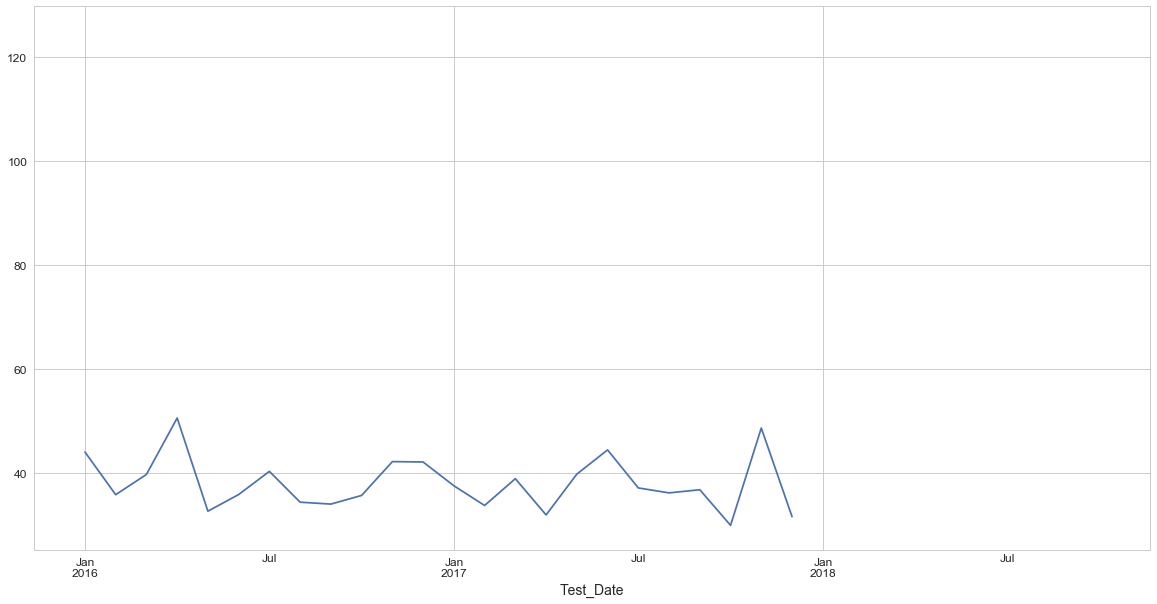

In [24]:
y.plot(figsize=(20, 10))
plt.show()

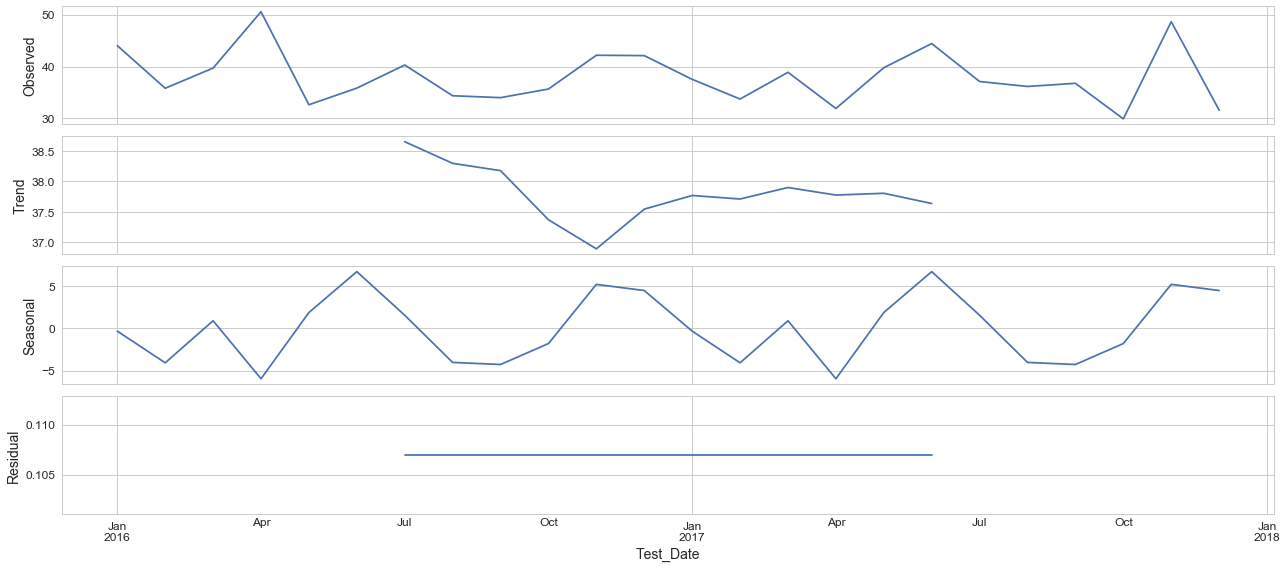

In [25]:
year = y['2016':'2017'].dropna()
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8
decomposition = stm.tsa.seasonal_decompose(year, model='additive')
fig = decomposition.plot()
plt.show()

In [26]:
import itertools
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [27]:
import warnings
warnings.filterwarnings("ignore")
for param in pdq:
     for param_seasonal in seasonal_pdq:
         try:
             mod = stm.tsa.statespace.SARIMAX(y,
                                             order=param,
                                             seasonal_order=param_seasonal,
                                             enforce_stationarity=False,
                                             enforce_invertibility=False)
             results = mod.fit()
             print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
         except:
             continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:253.07128658597273
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:116.4270218887799
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:126.77814640147434
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:225.34773454041232
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:104.91637059981234
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:125.82220357907866
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:-7.814878990493128
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:176.2256615301916
ARIMA(0, 1, 0)x(0, 1, 0, 12)12 - AIC:96.35833542633294
ARIMA(0, 1, 0)x(1, 0, 0, 12)12 - AIC:100.0701671396915
ARIMA(0, 1, 1)x(0, 0, 0, 12)12 - AIC:171.4383600129835
ARIMA(0, 1, 1)x(0, 1, 0, 12)12 - AIC:90.85743817740445
ARIMA(0, 1, 1)x(1, 0, 0, 12)12 - AIC:102.03341162467802
ARIMA(1, 0, 0)x(0, 0, 0, 12)12 - AIC:182.36171838577803
ARIMA(1, 0, 0)x(0, 1, 0, 12)12 - AIC:99.50708929172443
ARIMA(1, 0, 0)x(1, 0, 0, 12)12 - AIC:98.94429599982746
ARIMA(1, 0, 0)x(1, 1, 0, 12)12 - AIC:-0.28640369756015893
ARIMA(1, 0, 1)x(0, 0, 0, 12)12 - AIC:174.1253704673780

In [28]:
mod = stm.tsa.statespace.SARIMAX(y,
                                order=(0, 1, 1),
                                seasonal_order=(0, 1, 0, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1        -12.1754     57.244     -0.213      0.832    -124.371     100.021
sigma2         1.8853     18.428      0.102      0.919     -34.232      38.003


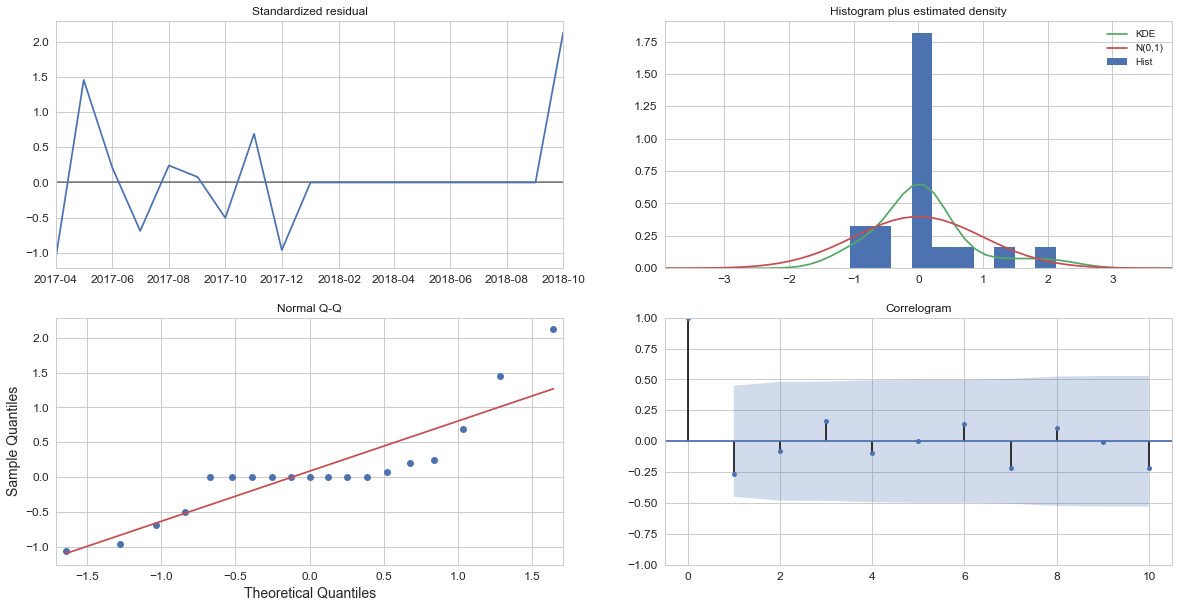

In [29]:
results.plot_diagnostics(figsize=(20, 10))
plt.show()

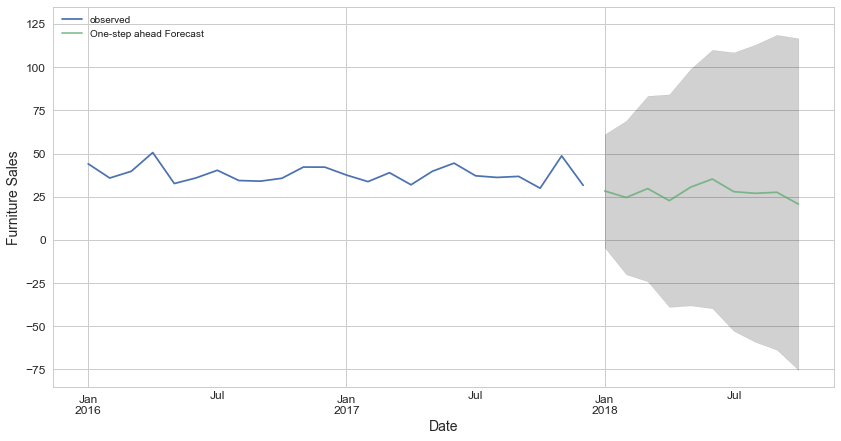

In [30]:
pred = results.get_prediction(start=pd.to_datetime('2018-01-01'), dynamic=False)
pred_ci = pred.conf_int()
ax = y['2016':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Furniture Sales')
plt.legend()
plt.show()

In [31]:
y_forecasted = pred.predicted_mean
y_truth = y['2018-01-01':]
mse = ((y_forecasted - y_truth) ** 2).mean()
mse

10876.487553478537

In [32]:
np.sqrt(mse)

104.29040010220757

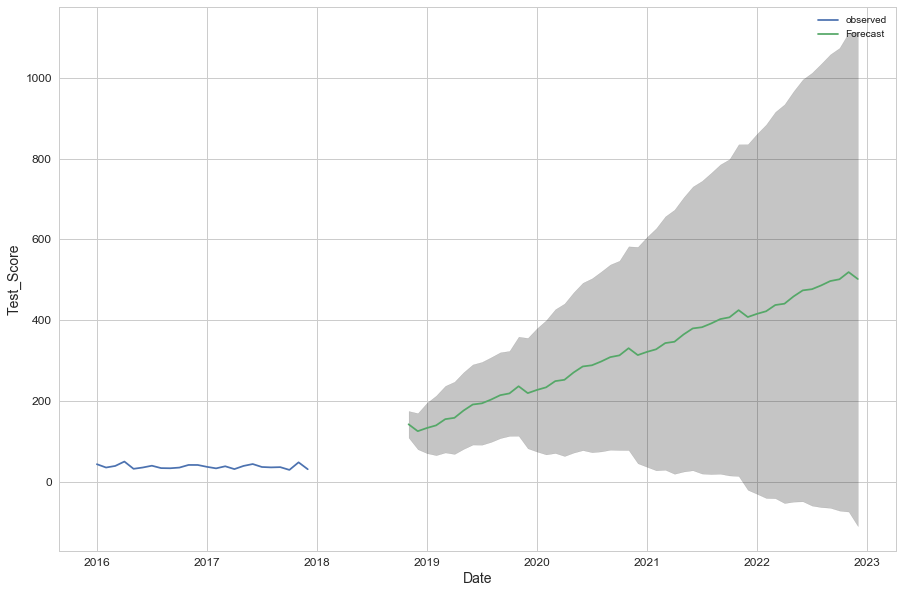

In [33]:
pred_uc = results.get_forecast(steps=50)
pred_ci = pred_uc.conf_int()
ax = y.plot(label='observed', figsize=(15, 10))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Test_Score')
plt.legend()
plt.show()
